In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv("penguins.csv")

In [30]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE
328,46.8,14.3,215.0,4850.0,FEMALE
329,50.4,15.7,222.0,5750.0,MALE
330,45.2,14.8,212.0,5200.0,FEMALE


In [31]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [32]:
le = LabelEncoder()
# Assuming your DataFrame is named df and the 'Sex' column contains the gender information
df['Sex_encoded'] = le.fit_transform(df['sex'])

In [33]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Sex_encoded
0,39.1,18.7,181.0,3750.0,MALE,1
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
3,36.7,19.3,193.0,3450.0,FEMALE,0
4,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,FEMALE,0
328,46.8,14.3,215.0,4850.0,FEMALE,0
329,50.4,15.7,222.0,5750.0,MALE,1
330,45.2,14.8,212.0,5200.0,FEMALE,0


In [34]:
df.drop('sex', axis=1, inplace=True)

In [35]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Sex_encoded
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
327,47.2,13.7,214.0,4925.0,0
328,46.8,14.3,215.0,4850.0,0
329,50.4,15.7,222.0,5750.0,1
330,45.2,14.8,212.0,5200.0,0


In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Sex_encoded
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,-1.006042


C:\Users\rayya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rayya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

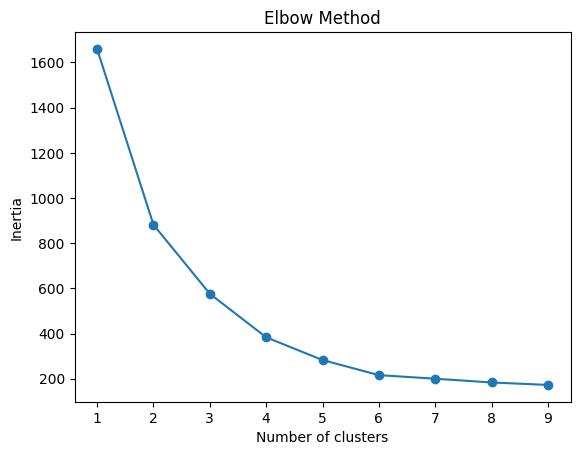

In [37]:
# Step 4 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

C:\Users\rayya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


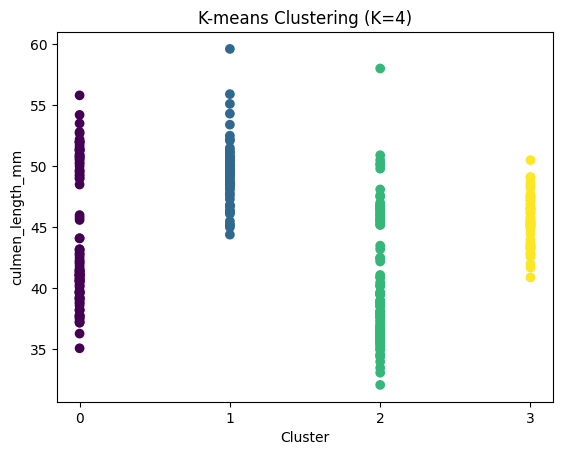

In [42]:
n_clusters=4

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
df['label'] = kmeans.labels_

# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(df['label'], df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(df['label'].min()), int(df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()



In [44]:
# Step - create final stat_penguins DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,49.473770,15.718033,221.540984
2,40.217757,17.611215,189.046729
3,45.563793,14.237931,212.706897
